In [1]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json
import proplot as plot
import concurrent.futures

data_folder=os.path.abspath('../postProcess')
save_folder=os.path.abspath('../postProcess/images')
transverse_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")

%load_ext autoreload
%autoreload 2


## Case Setting

In [2]:
Pe=0.01
pixelResolution=0.5e-6
DO2 = 7.63596e-6
w = 30e-6
U_0   = Pe*DO2/w
rhof =4.4890
rhoST= 1.2758
print(f"average inlet velocity: {U_0} m/s")
print(f"air flux: {U_0*60} m3/(m2 min) ")
print(f"air flux at ST: {U_0*60*rhof/rhoST} m3/(m2 min) ")
print(f"air flux at ST: {U_0*60*60*rhof/rhoST} m3/(m2 h) ")

print("----reference----")
print(f"reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  ")
print(f"recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)")
print(f"usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)")
print(f"Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [cf rate: 0.15m/d] ")


average inlet velocity: 0.00254532 m/s
air flux: 0.1527192 m3/(m2 min) 
air flux at ST: 0.5373542003448816 m3/(m2 min) 
air flux at ST: 32.2412520206929 m3/(m2 h) 
----reference----
reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  
recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)
usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)
Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [cf rate: 0.15m/d] 


### Comments
air flux is comparable to the normal CT experiments 

## Min/Max fields

In [3]:
file_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-2/postProcessing/minMaxComponents2/11.5/fieldMinMax.dat"
Ufile_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-2/postProcessing/minMaxMagnitude/11.5/fieldMinMax.dat"
sampling_rate=1

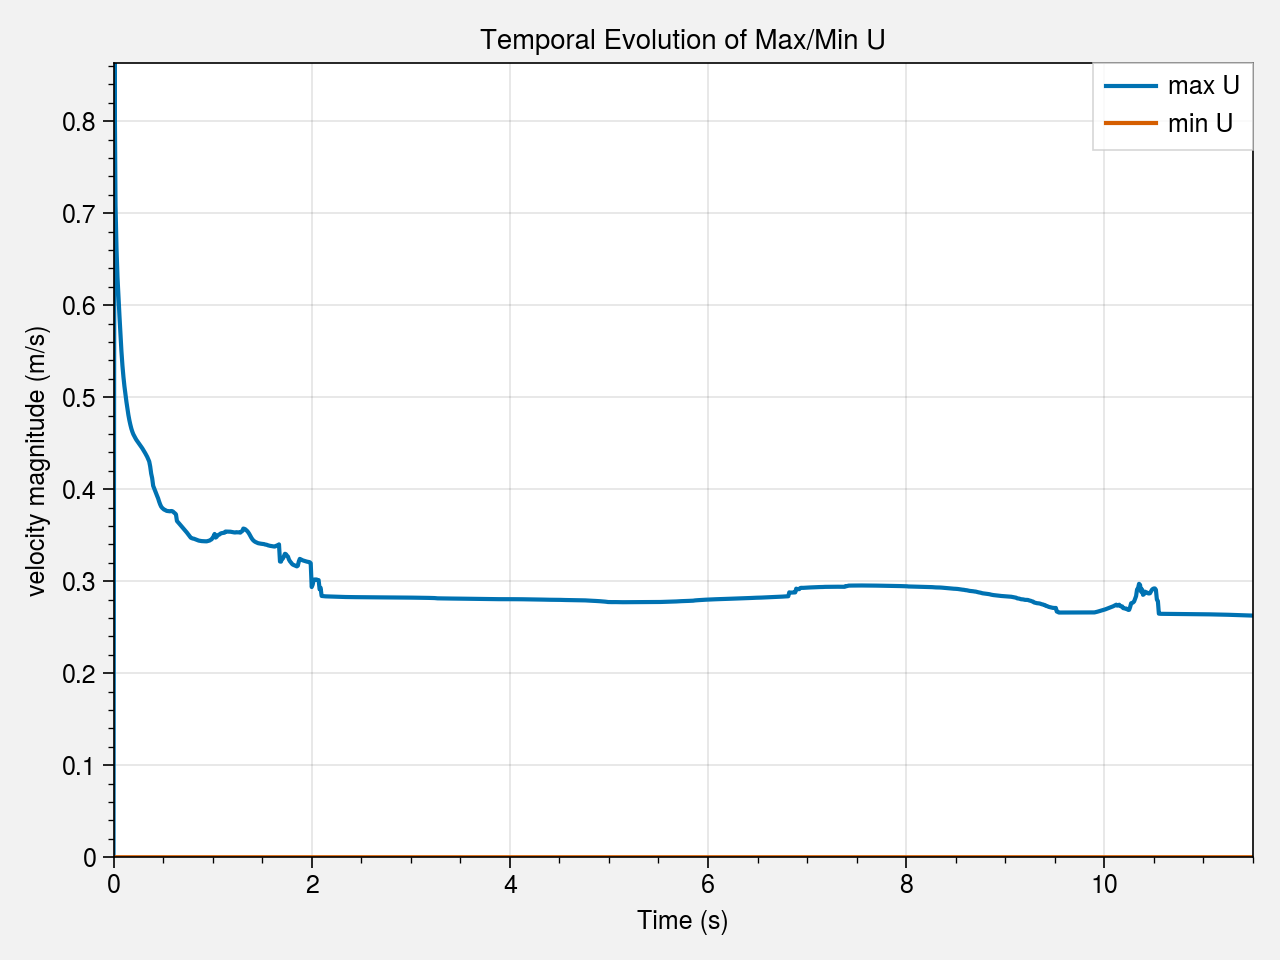

In [4]:
fig,ax,_=pyFigure.plot_min_max_field(Ufile_path,sampling_rate,"U","velocity magnitude (m/s)")

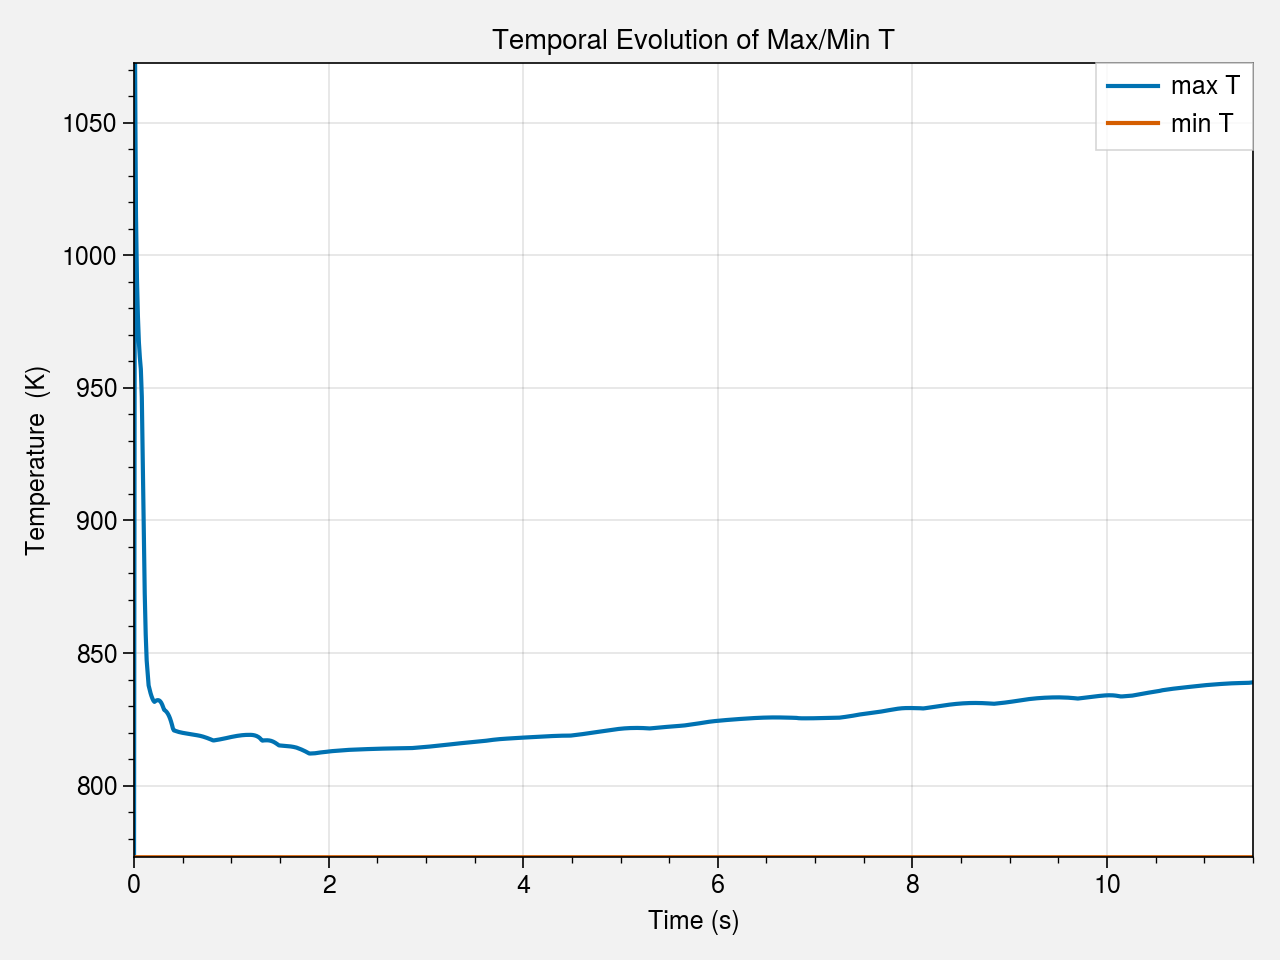

In [5]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"T","Temperature  (K)")

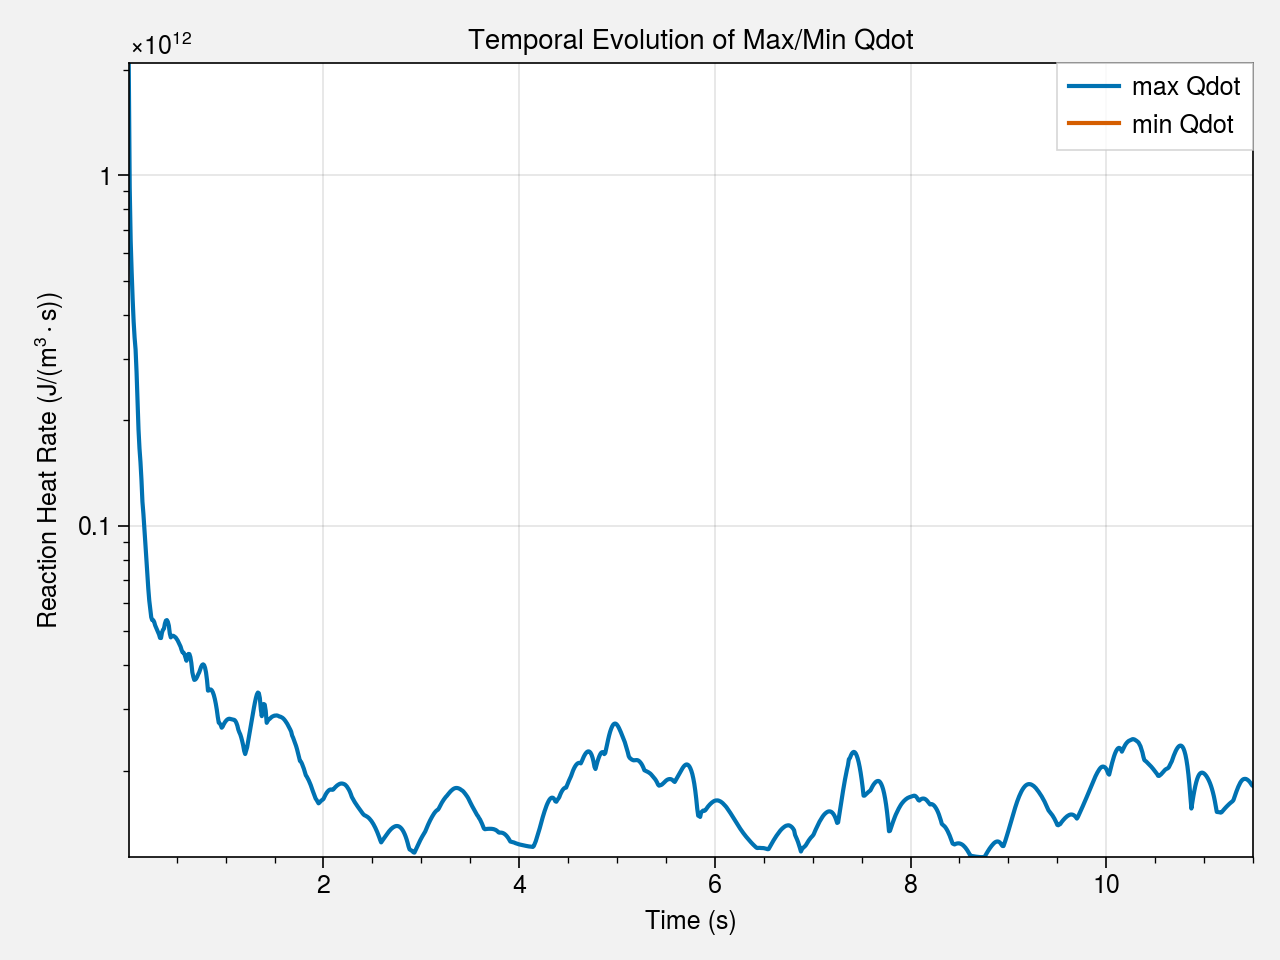

In [6]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"Qdot","Reaction Heat Rate (J/(m$^3\cdot$s))","log")
# ax.set_xlim([0.1,8.2])
# ax.set_ylim([1e10,2e11])

## Trasversly averaged fields

In [8]:
# workerNum=8
# compute_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")
# pyCompute.batchComputeTransverselyAverages(data_folder,compute_data_folder)

# # script="/home/anoldfriend/OpenFOAM/anoldfriend-7/utilities/postProcess/pyCompute.py"
# # cmd = f"python {script} -d {data_folder} -s {compute_data_folder} -t all -n {workerNum} "
# # print(cmd)
# # os.system(cmd)

In [9]:
pyFigure.get_times_from_data_folder(transverse_data_folder)

array(['0.01', '0.11', '0.21', '0.31', '0.41', '0.51', '0.61', '0.71',
       '0.81', '0.91', '1.01', '1.11', '1.21', '1.31', '1.41', '1.51',
       '1.61', '1.71', '1.81', '1.91', '10.01', '10.11', '10.21', '10.31',
       '10.41', '10.51', '10.61', '10.71', '10.81', '10.91', '11.01',
       '11.11', '11.21', '11.31', '11.41', '2.01', '2.11', '2.21', '2.31',
       '2.41', '2.51', '2.61', '2.71', '2.81', '2.91', '3.01', '3.11',
       '3.21', '3.31', '3.41', '3.51', '3.61', '3.71', '3.81', '3.91',
       '4.01', '4.11', '4.21', '4.31', '4.41', '4.51', '4.61', '4.71',
       '4.81', '4.91', '5.01', '5.11', '5.21', '5.31', '5.41', '5.51',
       '5.61', '5.71', '5.81', '5.91', '6.01', '6.11', '6.21', '6.31',
       '6.41', '6.51', '6.61', '6.71', '6.81', '6.91', '7.01', '7.11',
       '7.21', '7.31', '7.41', '7.51', '7.61', '7.71', '7.81', '7.91',
       '8.01', '8.11', '8.21', '8.31', '8.41', '8.51', '8.61', '8.71',
       '8.81', '8.91', '9.01', '9.11', '9.21', '9.31', '9.41', '9.51',

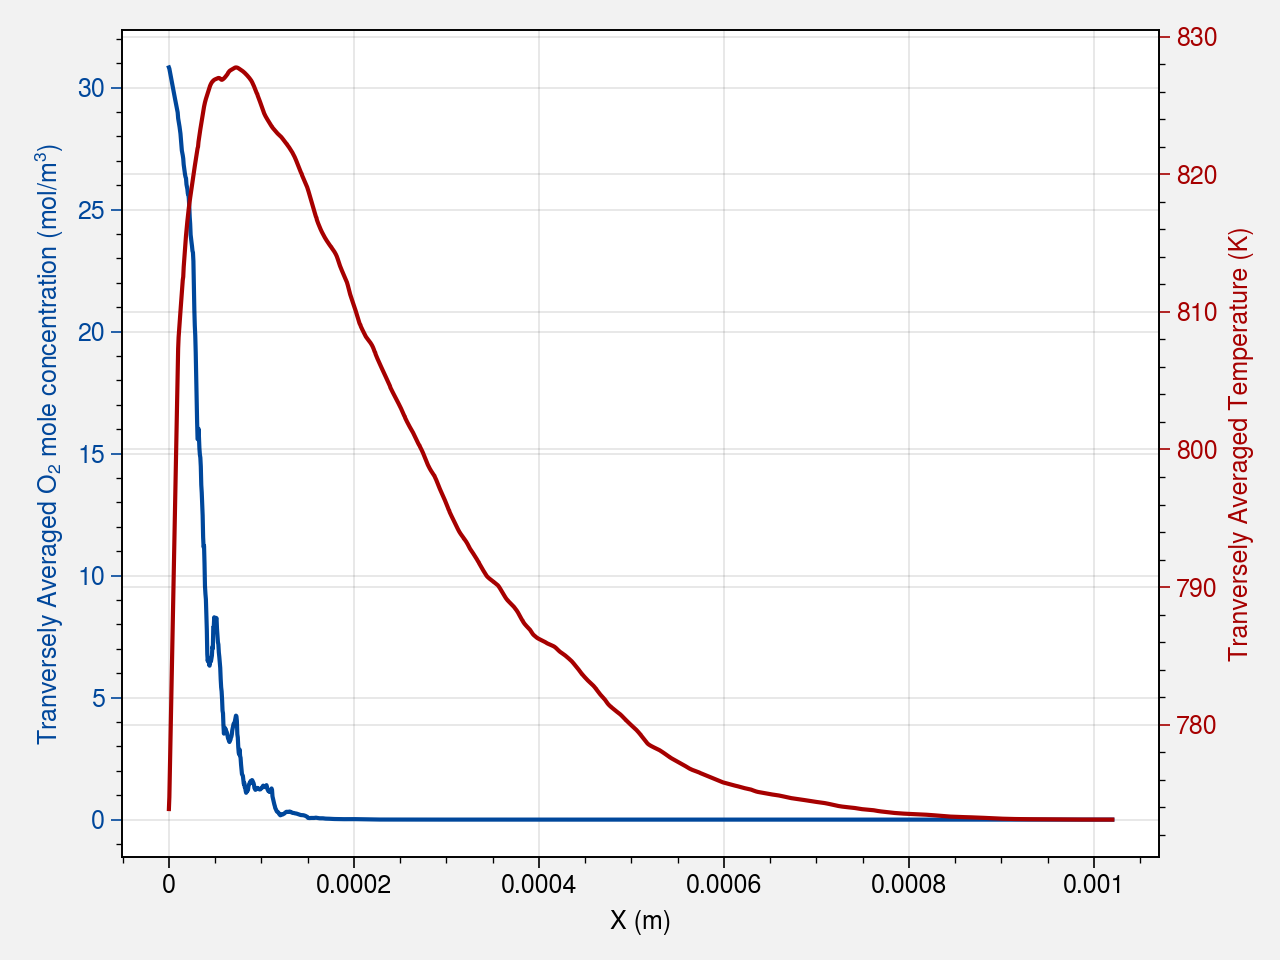

In [10]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.11")

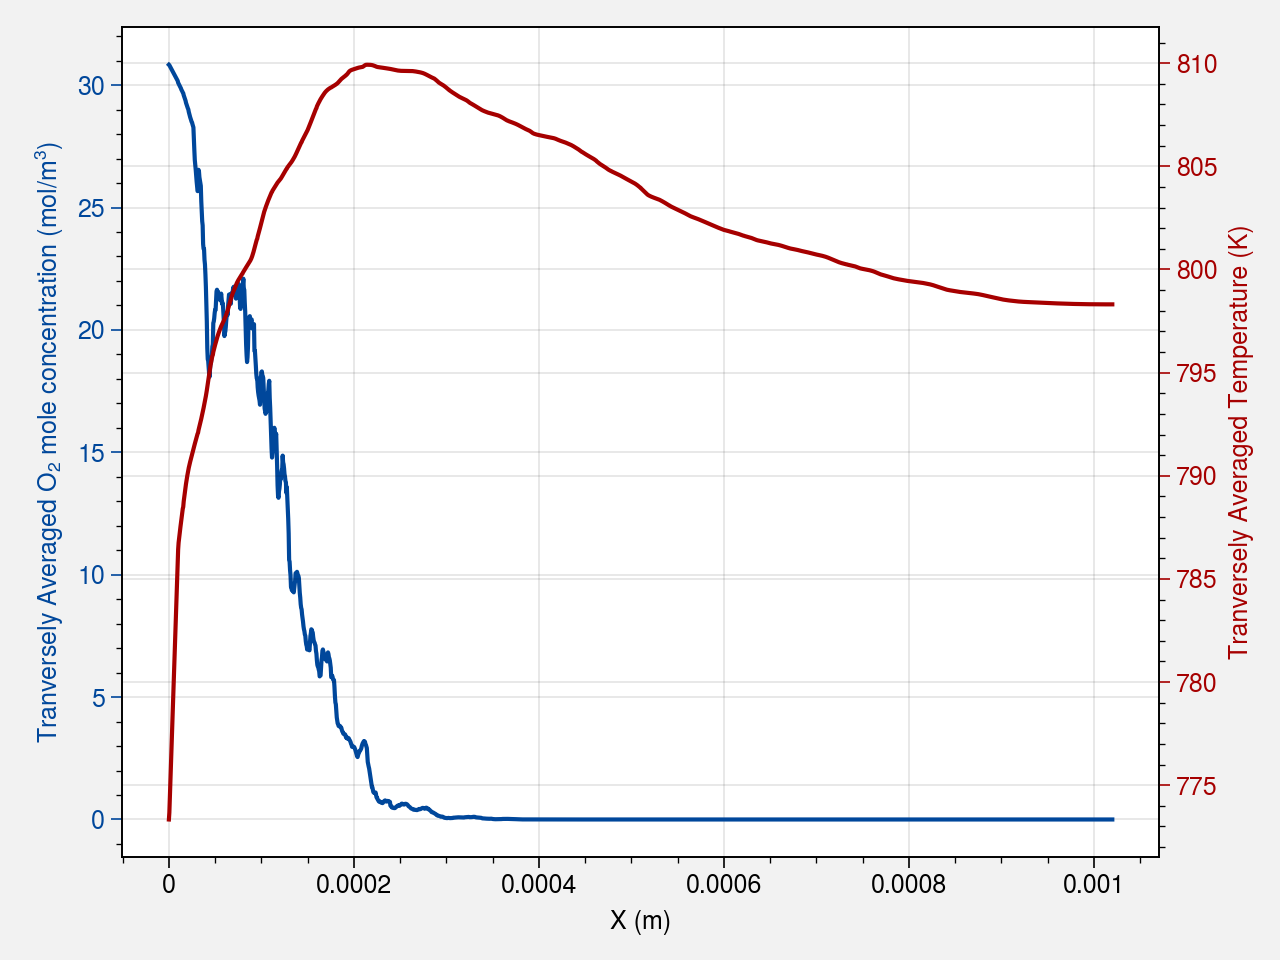

In [11]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"1.01")

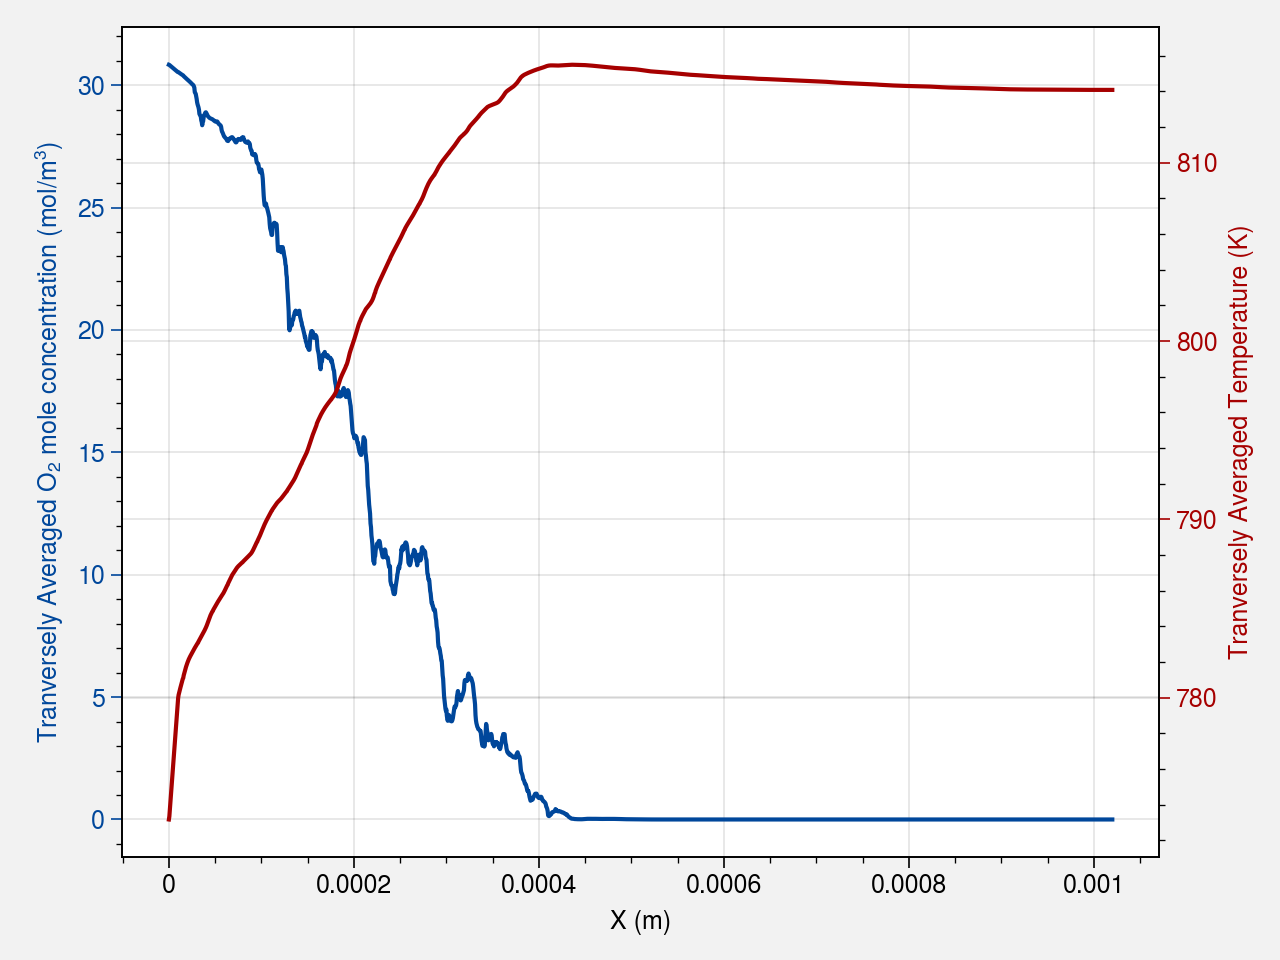

In [12]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"4.01")

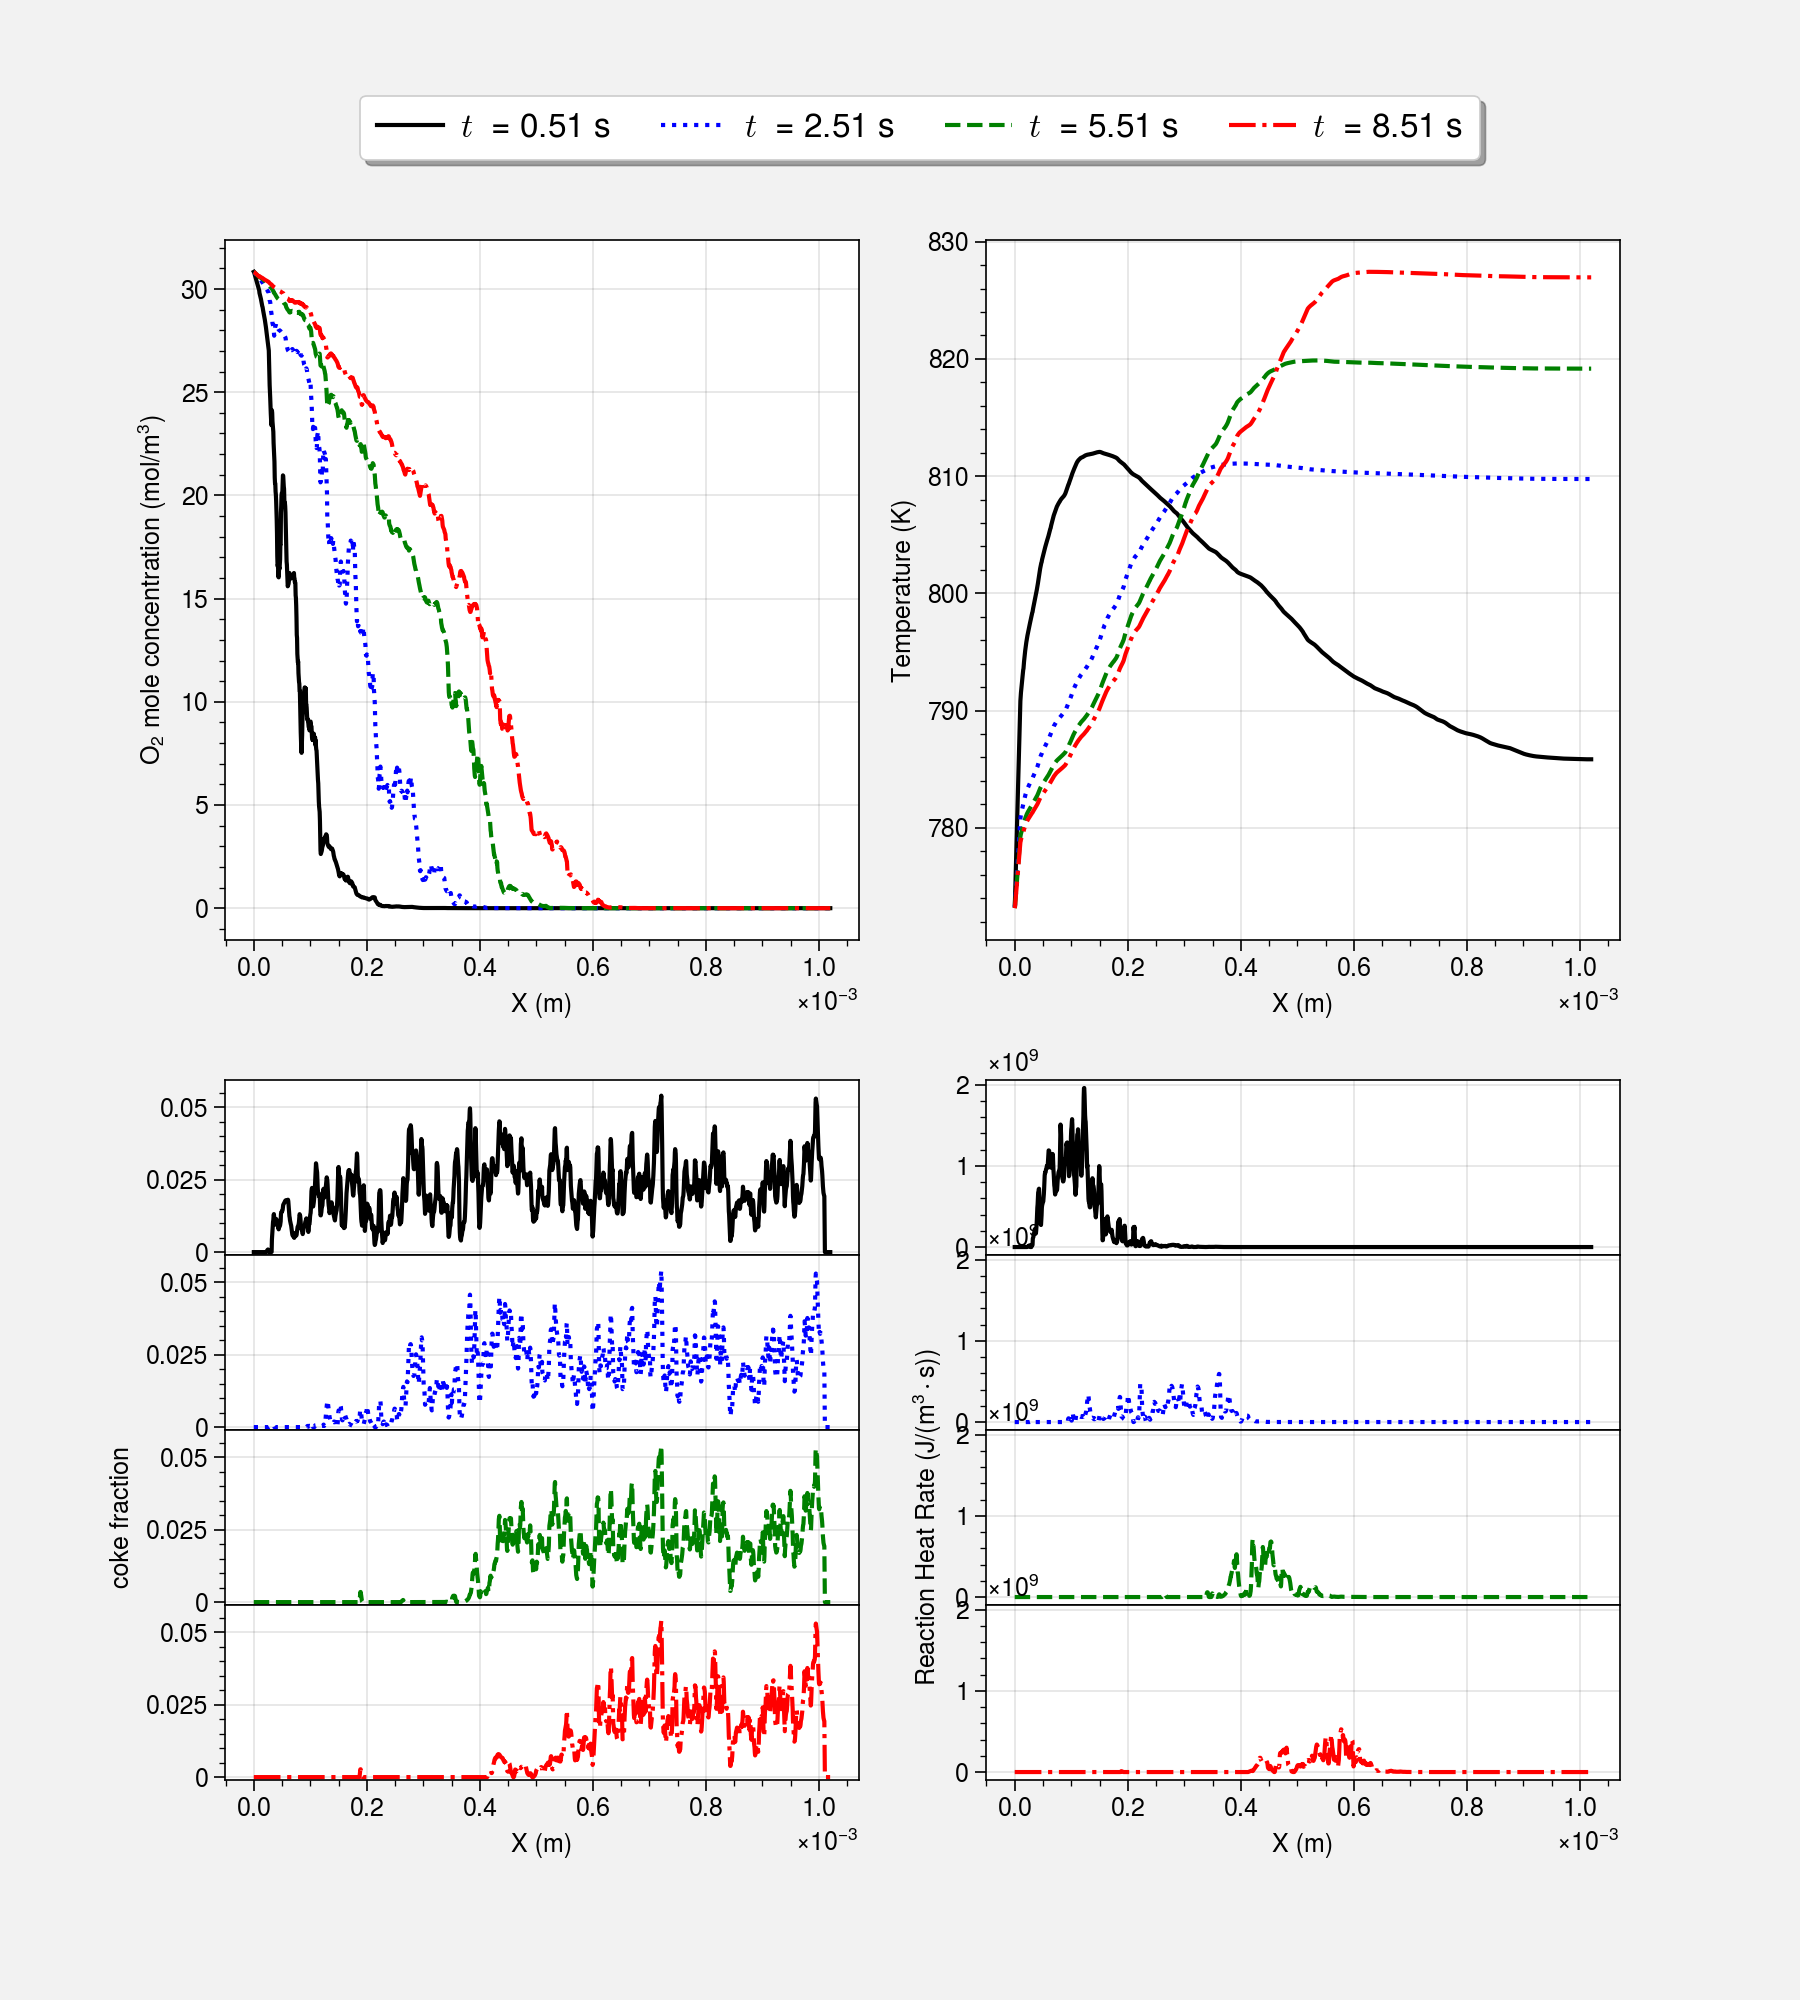

In [13]:
times=["0.51","2.51","5.51","8.51"]
fig=pyFigure.plot_transverse_averages_of_multiple_times(transverse_data_folder,times)


In [14]:
fig.savefig("transverselyAveragesOfMultipleTimeInstants.jpg",bbox_inches='tight')

## Show the reaction rate and burning rate

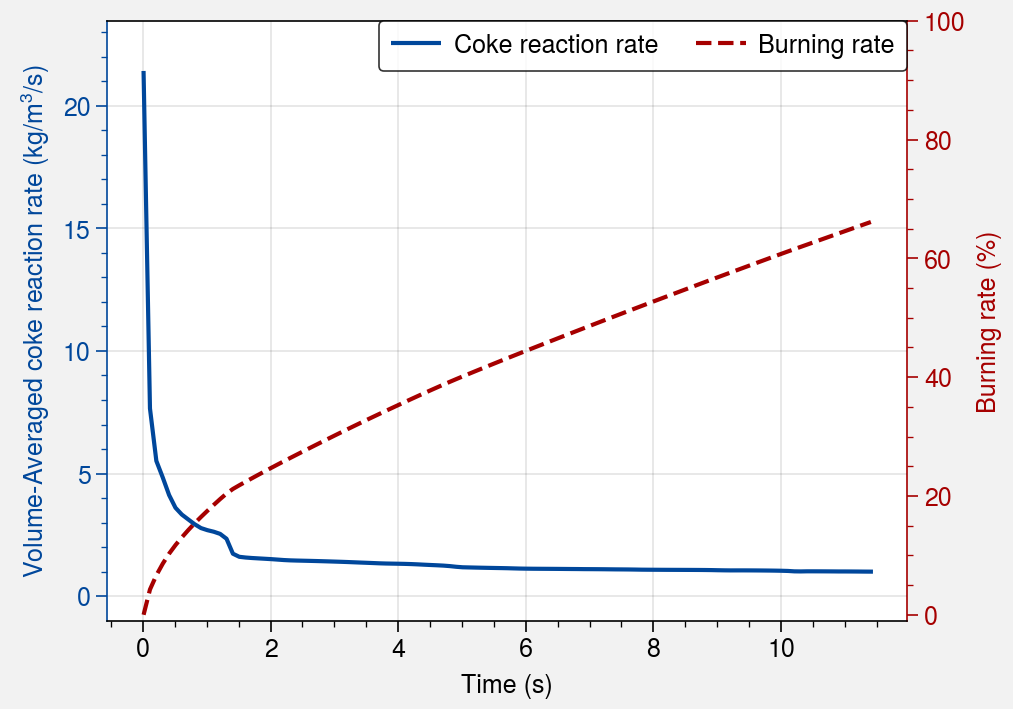

In [15]:
df_rate=pd.read_csv("../postProcess/others/ReactionRateAndBurningRate.csv")

ax1,ax2,fig=pyFigure.plot_reaction_rate_burning_rate(df_rate)

In [16]:
fig.savefig("ReactionRateAndBurningRate.jpg",bbox_inches='tight')

In [17]:
pixelResolution=0.5e-6
DO2=7.63596e-6
df_O2_flux_at_inlet=pd.read_csv("../postProcess/others/O2FluxsAtInlet.csv")

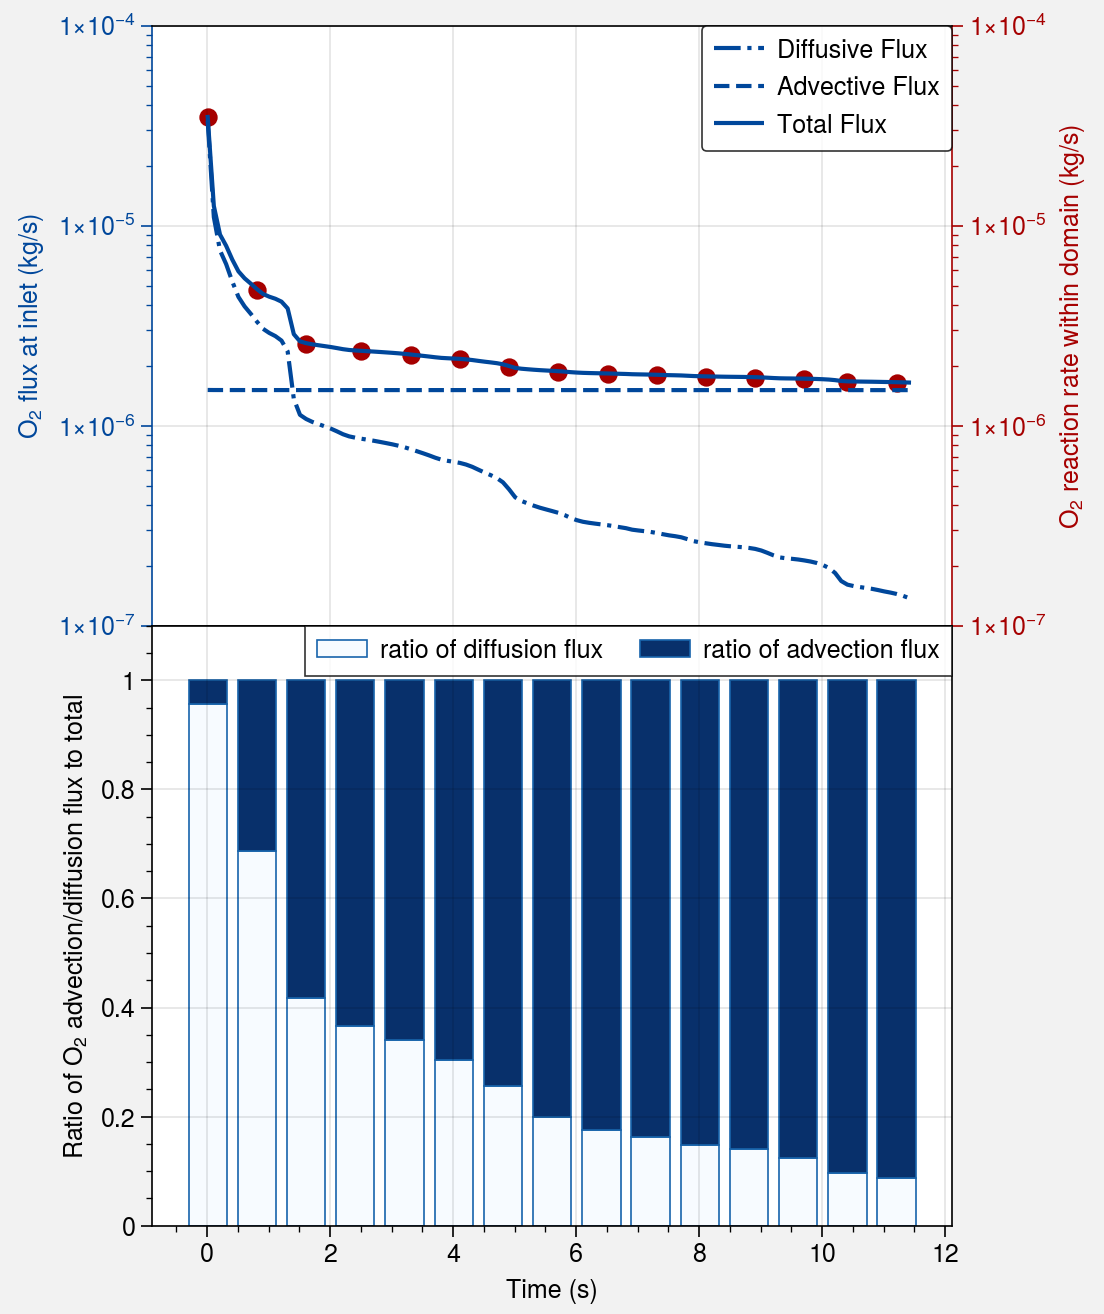

In [18]:
ax,ax2,fig=pyFigure.plot_O2_flux_reaction_rate(df_O2_flux_at_inlet,df_rate,pixelResolution,DO2,sampling_rate=8,ylim=(1e-7,1e-4))

In [19]:
fig.savefig("O2Flux_ReactionRate.jpg",bbox_inches='tight')

## Show the max temperature and O2 concentration at the outlet

In [20]:
df_combined=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(file_path,transverse_data_folder)

(-2.0, 32.0)

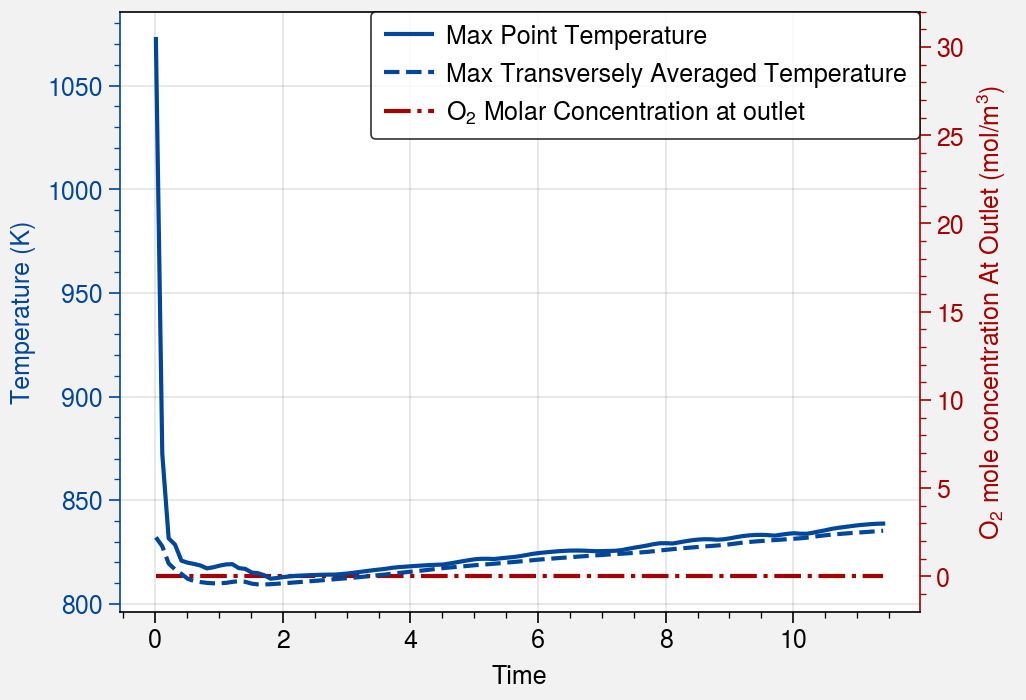

In [21]:
ax1,ax2,fig=pyFigure.Plot_MaxTemperature_OutletO2ConcHistory(df_combined)
ax2.set_ylim([-2,32])

In [22]:
fig.savefig("MaxTemperature_OutletO2ConcHistory.jpg",bbox_inches='tight')